# TensorFlowチュートリアル(CNNでMNISTのデータを分類する)
## 1. パッケージのインポート
まずは，種々のパッケージのインポートを行う (\_\_future\_\_はpython2でpython3の記法をするためのもの)

In [33]:
########パッケージのインポート#########
from __future__ import absolute_import, unicode_literals
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
import tfgraphviz as tfg

## 2. メソッドの定義
メソッドの定義を行う

---

### def conv2d(x, W)
CNNにおける畳込み層の計算を定義している．

#### 入力
- x : 入力ベクトル
- W : 畳み込みにおける重み

#### 出力
- 畳み込みの計算結果

---

In [34]:
#畳み込み層の定義
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

---

### def max_pool2x2(x)
CNNにおけるプーリング層の計算を定義している．

#### 入力
- x : 入力ベクトル

#### 出力
- プーリングの計算結果

---

In [35]:
#プーリング層の定義
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')

---

### def weight_variable(x)
ニューラルネットワークにおける重みの計算を行う

#### 入力
- shape: 入力ベクトルのshape
(shape...TensorFlowにおけるベクトルの形を示すデータ)

#### 出力
- 重みの算出結果

---

In [36]:
#重み
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

---

### def bias_variable(x)
ニューラルネットワークにおけるバイアスの定義を行う

#### 入力
- x : 入力ベクトルのshape
(shape...TensorFlowにおけるベクトルの形を示すデータ)

#### 出力
- バイアスの算出結果

---

In [37]:
#バイアス
def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

---

### def loss(t, f)
損失関数の定義を行う

#### 入力
- t : ラベル
- f : 写像

#### 出力
- 損失値の算出結果

---

In [38]:
#損失関数のメソッド
def loss(t, f):
    cross_entropy = tf.reduce_mean(-tf.reduce_sum(t * tf.log(f)))
    return cross_entropy

---

### def accuraacy(t, f)
精度の定義を行う

#### 入力
- t : ラベル
- f : 写像

#### 出力
- 精度の算出結果

---

In [39]:
#精度を算出するメソッド
def accuracy(t, f):
    correct_prediction = tf.equal(tf.argmax(t, 1), tf.argmax(f, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return accuracy

## 3. ニューラルネットワークの構造を定義する
今回扱うディープラーニングのアルゴリズムは，CNN(Convolutional Neural Network)である．
CNNは主に画像処理に使用されるアルゴリズムである．
これは人間が画像を見る時にピクセルごとに見るのではなく，一定のまとまった範囲を見ていることをヒントに作成されたアルゴリズムである．
このCNNでは，そのような一定の範囲のまとまったピクセル群を1つのデータに**畳み込む**作業をしている．

---
### 変数の宣言
まずは，入力の次元数等を変数で宣言する

In [40]:
#次元数を定義する
Q = 784 #入力ベクトルの次元数(28x28の画像を扱うので784となる)
P = 784
R = 10 #出力の次元数 (10種類の数字に分類するので10となる)

### (層1，層？) 入力層と出力層の定義
入力はXという変数で定義している．入力の型は"dtype"で定義され，ベクトルの形は"shape"で定義される．
shapeは現状でまだ分からない数(ここでは入力ベクトルの数)は"None"で定義している．
この箇所はプレースホルダといい，学習を実行する際に変数として代入することができる．

In [42]:
#アフィン層を作る(f = Wx + b)
##Q次元のベクトルをいくつか並べた行列Xを定義（"いくつか"という部分はプレースホルダとしてあとで設定する）
X = tf.placeholder(dtype = tf.float32, shape = [None, Q])
t = tf.placeholder(dtype = tf.float32, shape = [None, R])

### (層2,層3) 第一の畳み込み層とプーリング層の定義
- 畳み込み層とは...
- プーリング層とは...


In [43]:
#第一の畳込みとプーリングの計算
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
x_image = tf.reshape(X, [-1, 28, 28, 1])
h_conv1 = tf.nn.relu(tf.nn.conv2d(x_image, W_conv1,strides=[1,1,1,1], padding='SAME') + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

### (層4,層5) 第二の畳み込み層とプーリング層の定義
ほとんど前セルと同一であるが，畳み込みのパラメータが異なっている

In [44]:
#第二の畳込みとプーリングの計算
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(tf.nn.conv2d(h_pool1, W_conv2,strides=[1,1,1,1], padding='SAME') + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

### (層6) 全結合層の定義

In [45]:
#全結合層の計算
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])
h_pool2_flat = tf.reshape(h_pool2, [-1, 7 * 7 * 64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

### DropOutの定義

In [46]:
#DropOutの計算
keep_prob = tf.placeholder('float')
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

### (層7) 読み出し層の定義

In [47]:
#読み出し層
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
#ソフトマックス関数を返す
y_conv = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

#損失関数
loss = loss(t, y_conv)
acc = accuracy(t, y_conv)

#最適化アルゴリズムを設定(最急降下法)
#opitimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
#最適化アルゴリズムを設定(Adam)
optimizer = tf.train.AdamOptimizer()
train_step = optimizer.minimize(loss)


#グラフ描画
#tfg.board(tf.get_default_graph())

### セッションの生成
セッションとは，Tensorflowにおける学習と分類の一連の流れのことである．
通常は写像を定義してからセッションを始めるのだが，以下のようにInteractiveSession()という関数を用いることで写像を定義する前にセッションを始めることができる．

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
step 0, training accuracy 0.1135, loss 673.022
step 20, training accuracy 0.613, loss 74.8135
step 40, training accuracy 0.8866, loss 23.326
step 60, training accuracy 0.9126, loss 22.9965
step 80, training accuracy 0.9174, loss 16.2502
step 100, training accuracy 0.9388, loss 8.96242
step 120, training accuracy 0.9424, loss 9.5075
step 140, training accuracy 0.9519, loss 9.6041
step 160, training accuracy 0.9536, loss 14.3002
step 180, training accuracy 0.9497, loss 3.09404


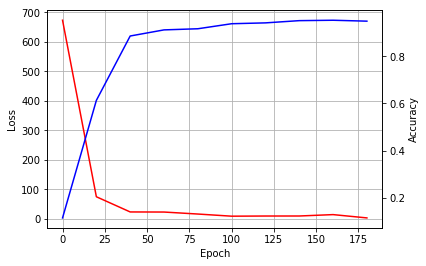

In [48]:
##############学習とテストを行う#################

#TensorFlowのAPIを使用してMNISTのデータを取得する
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

#プロットに使用するリストを定義する
epoch_list=[]
acc_list=[]
loss_list=[]


#初期化
init_op = tf.global_variables_initializer()

with tf.Session() as sess:
    #初期化の実行
    sess.run(init_op)
    #学習の実行
    #50個のサンプルによるミニバッチ学習
    ##200回のエポック数で学習させる
    for epoch in range(200):
        #バッチ数を50とし，データセットからランダムで取得する
        batch = mnist.train.next_batch(50)
        #20エポック毎にテストデータでテストさせる
        if epoch % 20 == 0:
            #精度を算出
            test_accuracy = acc.eval(feed_dict={
                X: mnist.test.images, t: mnist.test.labels, keep_prob: 1.0})
            #損失を算出
            test_loss = loss.eval(feed_dict={
                X: batch[0], t: batch[1], keep_prob: 1.0})
            print 'step %d, training accuracy %g, loss %g' % (epoch, test_accuracy, test_loss)
            #後ほどグラフで使用するのでエポック数，精度，損失をリストに格納しておく
            epoch_list.append(epoch)
            acc_list.append(test_accuracy)
            loss_list.append(test_loss)
        train_step.run(feed_dict={X: batch[0], t: batch[1], keep_prob: 0.5})


# 損失率と精度のプロット
fig , ax = plt.subplots()
ax2 = ax.twinx()
ax.set_ylabel('Loss')
ax2.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.grid()
p1 = ax.plot(epoch_list, loss_list, color='red')
p2 = ax2.plot(epoch_list, acc_list,color='blue')
ax.legend()
ax2.legend()
plt.show()

sess.close()

参考: https://qiita.com/To_Murakami/items/35d1b3144a0d017ad0ee